# Bank Campaing project. 

### Variable explaination:

The dataset has the following attributes:

* age (numeric)
* job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")
* contact: contact communication type (categorical: "unknown","telephone","cellular")
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

Lets Begain with the relative questions:

* 1: What is the goal of the bank campaign, and how does it relate to the target variable "deposit"?
* 2: What are the demographic characteristics of the customers in the dataset (age, job, marital status, education)?
* 3: How do the customers' account balances and other financial information (default, balance, loan, housing) relate to their likelihood of making a deposit?
* 4: What time of year and day of the week is the bank most successful in reaching customers?
* 5: How do the duration and frequency of contact (duration, campaign) affect the customers' decision to make a deposit?
* 6: Have the customers been contacted by the bank before (pdays, previous), and does this affect their likelihood of making a deposit?
* 7: What was the outcome of previous bank campaigns (poutcome), and how does it relate to the current campaign's success?


## 0.0: Import the libraries

In [725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import sklearn
from scipy import stats


from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)


## 1. Data Exploration:

In [726]:
# Read the data 
df = pd.read_csv('bank.csv')

In [727]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [729]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [730]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11162.0,NaN,NaN,NaN,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,3,married,6351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,11162,2,no,10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162.0,NaN,NaN,NaN,15.658036,8.42074,1.0,8.0,15.0,22.0,31.0


In [731]:
df.shape

(11162, 17)

In [732]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [733]:
df.duplicated().sum()

0

Data Exploration first insighs: As we can see, there aren't duplicates or missing values in the dataset. 

In [734]:
# we are separating the categorical columns in two groups, numerical and categorical.
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
category_col = df.select_dtypes(include=['object']).columns

# Now we focus on the categorical columns to explore its variables.
for col in category_col:
    print(col, "(", len(df[col].unique()), "values):")
    print(df[col].unique())
    print(df[col].value_counts(normalize=True))
    print("\n")

job ( 12 values):
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64


marital ( 3 values):
['married' 'single' 'divorced']
marital
married     0.568984
single      0.315176
divorced    0.115839
Name: proportion, dtype: float64


education ( 4 values):
['secondary' 'tertiary' 'primary' 'unknown']
education
secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: proportion, dtype: float64


default ( 2 values):
['no' 'yes']
default
no     0.984949
yes    0.015051
Name: proportion, dtype: float64


housing ( 2 

## 2. EDA: 

* 1: What is the goal of the bank campaign, and how does it relate to the target variable "deposit"?

deposit
no     0.52616
yes    0.47384
Name: count, dtype: float64


<Axes: xlabel='deposit', ylabel='count'>

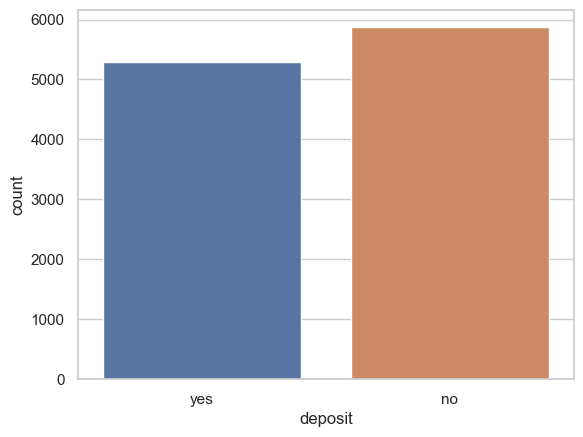

In [735]:
print(df['deposit'].value_counts()/df.shape[0])
sns.countplot(x='deposit', data=df)

**Insight:**
We can see that the goal of the bank campaing is to encourage clients to manke a deposit, so the deposit variable is our target variable that we want to predict.

### 2.: What are the demographic characteristics of the customers in the dataset (age, job, marital status, education)?


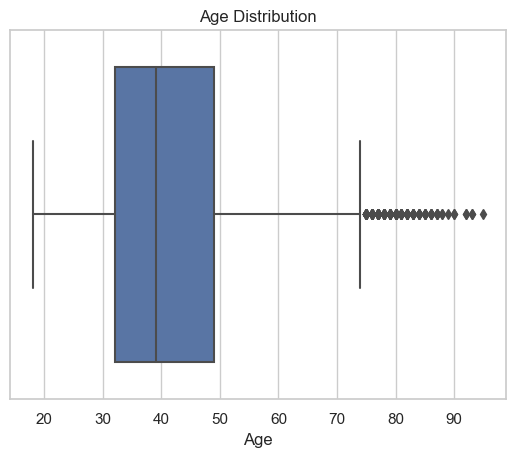

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


In [736]:
sns.set_style('whitegrid')

ax = sns.boxplot(x=df['age'])

ax.set_title('Age Distribution')
ax.set_xlabel('Age')

plt.show()
print(df['age'].describe())

As we can see, the mean age of the costumers is 41 years old, and the standard deviation is 11 years old.

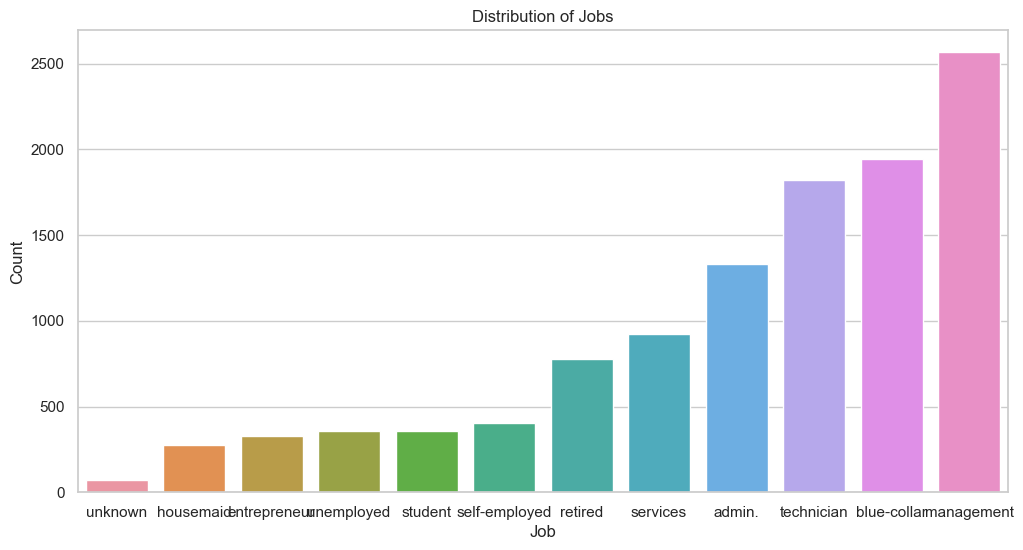

              Job  Value Counts
0      management          2566
1     blue-collar          1944
2      technician          1823
3          admin.          1334
4        services           923
5         retired           778
6   self-employed           405
7         student           360
8      unemployed           357
9    entrepreneur           328
10      housemaid           274
11        unknown            70


In [737]:
job_counts = df['job'].value_counts().sort_values()
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=df['job'], order=job_counts.index, ax=ax)
ax.set_title('Distribution of Jobs')
ax.set_xlabel('Job')
ax.set_ylabel('Count')
plt.show()

job_counts = df['job'].value_counts().reset_index()
job_counts.columns = ['Job', 'Value Counts']
job_counts = job_counts.sort_values(by=['Value Counts'], ascending=False)
print(job_counts)


As we can see here, the most job categories with the highest number of people are Management and Blue-collar.

<Axes: xlabel='education', ylabel='count'>

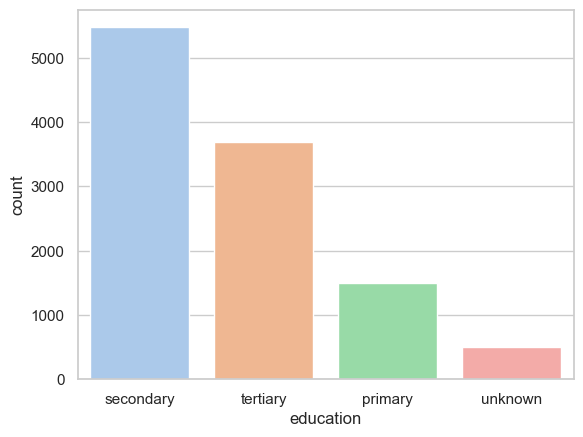

In [738]:
# Plot the counts of education
sns.countplot(data=df, x='education')


The are more clients with secondary education than teriary education.

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

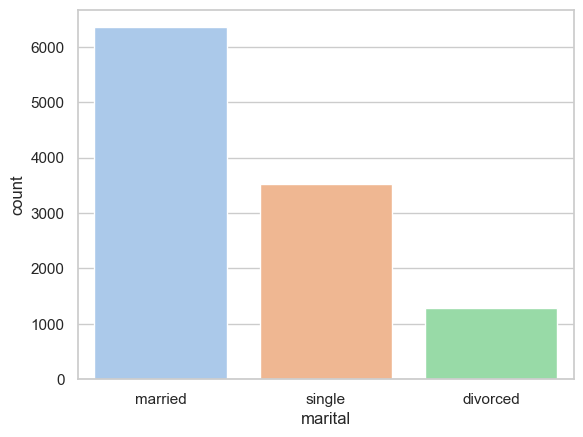

In [739]:
# Counts of marital status categories
sns.countplot(data=df, x='marital')
  

df['marital'].value_counts()

as we can see here, most of the clients are married, the second large group of clients are single.

<Axes: xlabel='housing', ylabel='count'>

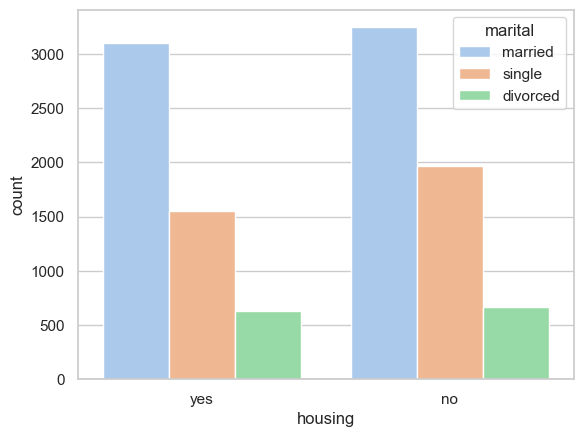

In [740]:
# Plot the counts of housing divided by marital status.
sns.countplot(data=df, x='housing', hue='marital')


Now, we are exploring the clients of the bank, we 've made a graphic that shows wich group (single, married and divorce) posses a housing loan.
According to the following graphic description the largest group is the married gruup and the smallest group is the divorced people.

<Axes: xlabel='loan', ylabel='count'>

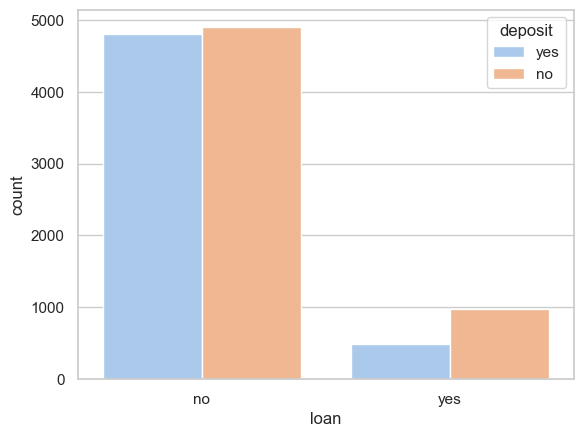

In [741]:
# Plot the counts of loan
sns.countplot(data=df, x='loan', hue='deposit')


As we can see here, the number of clients that have made a deposit without a loan is relatively big compared to the number of clients that have made a deposit with a loan in the bank, this information tells us wich clients we need to aim for.

<Axes: xlabel='deposit', ylabel='previous'>

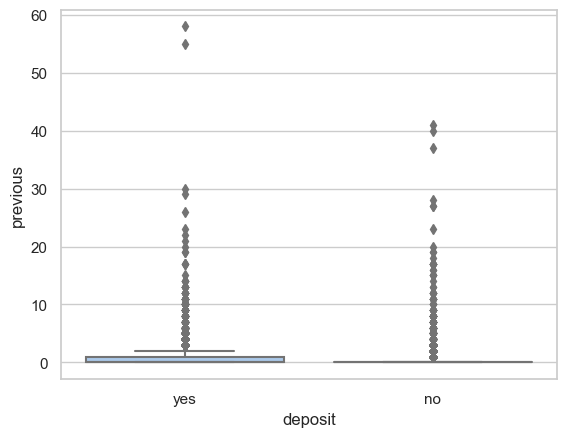

In [742]:
# Create a boxplot of previous by deposit status
sns.boxplot(data=df, x='deposit', y='previous')


In this graphic we try to understand if the clients who the bank've contacted previously have been made a deposit, as we can see, the group is relatively big as the number of outliers. 

deposit,no,yes
poutcome,,
failure,0.50,0.50
other,0.43,0.57
success,0.09,0.91
unknown,0.59,0.41


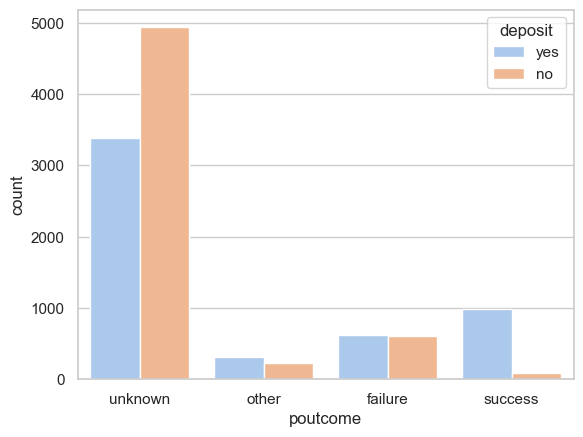

In [743]:
# Plot the counts of poutcome for the current campaign
sns.countplot(data=df, x='poutcome', hue='deposit')

# Cross-tabulate poutcome and deposit to calculate the success rate for each previous outcome
pd.crosstab(df['poutcome'], df['deposit'], normalize='index').round(2)



We've made a graphic and a dataframe tha shows the success of the prevouse campaing, the client who had suscribed in the previous campaing are more likely to deposit in the next campaing, however the clients who are registrated by "other" are more likely to deposit in the next campaing.

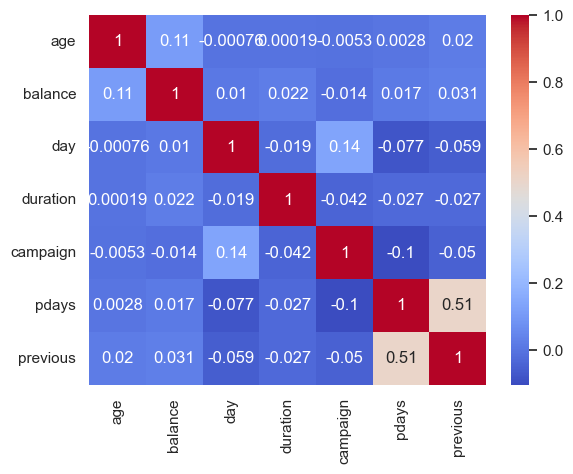

In [744]:
# Now we'll select only the numerical columns and create a correlation matrix for numerical columns

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical_corr = df[numerical_cols].corr()
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm')
plt.show()

We've made a correlation matrix between the numerical columns, as we can see the balance and age have a correlation (0.11) the same as the balance and previos (0.031). previos and pdays have a strong correlation (0.51).

## Stadistical Analysis

In [745]:
# Calculate descriptive statistics
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
desc_stats = df[num_cols].describe()
desc_stats

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


We performed a descriptive stadistic from the most significant variables.

* From this we can see that the dataset contains information on 11162 clients of the bank.
* The average age of the clients is around 41 years.
* the average balance of the clients is 1528.5 with a standard deviation of 3225

In [746]:
# t-test
loan_yes = df[df['loan'] == 'yes']['balance']
loan_no = df[df['loan'] == 'no']['balance']
t_stat, p_value = stats.ttest_ind(loan_yes, loan_no, equal_var=False)

# Print results
print("T-statistic: {:.2f}".format(t_stat))
print("p-value: {:.4f}".format(p_value))


T-statistic: -11.91
p-value: 0.0000


**Ingsights:**

We've made a T-test between two groups of bank customers based on whether they have a personal loan or not.

The negative t-statistic indicates that the mean balance of those with loan is significantly lower than those without a loan.

The P-value is low and indicates that the difference in means between the two groups of bank customers is unlikely to be due to chance

## 3. Feature Engineering: 


In [747]:
# we perform the one-hot encoding to convert categorical variables into numeric, after converting those variables to numeric we fit the model to a logistic regression.
# One-hot encode categorical variables
X = pd.get_dummies(df.drop(['deposit'], axis=1))
# Convert target variable to binary
y = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Print coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': logreg.coef_[0]})
print(coef_df)


                feature  coefficient
0                   age    -0.012261
1               balance     0.000024
2                   day     0.007646
3              duration     0.003852
4              campaign    -0.222064
5                 pdays    -0.000644
6              previous     0.189462
7            job_admin.    -0.009691
8       job_blue-collar    -0.191774
9      job_entrepreneur    -0.022918
10        job_housemaid    -0.006509
11       job_management     0.020018
12          job_retired     0.128265
13    job_self-employed    -0.015189
14         job_services    -0.066554
15          job_student     0.051823
16       job_technician    -0.032450
17       job_unemployed     0.007269
18          job_unknown     0.001450
19     marital_divorced     0.005930
20      marital_married    -0.152505
21       marital_single     0.010314
22    education_primary    -0.076193
23  education_secondary    -0.170108
24   education_tertiary     0.093478
25    education_unknown     0.016563
2

**F.E One-hote encoding Insights:**

This is coefficients of the logistic regression model that was fit using all the variables in the data set except for the target variable deposit. The logistic regression model predicts the probability that the target variable is 1 (i.e., the customer makes a deposit), given the values of the input features. A positive coefficient for a feature indicates that an increase in the value of that feature is associated with an increased probability of the customer making a deposit, while a negative coefficient indicates that an increase in the value of that feature is associated with a decreased probability of the customer making a deposit.

For example, we can see that the coefficient for balance is positive, which suggests that customers with higher account balances are more likely to make a deposit. Conversely, the coefficient for campaign is negative, which suggests that customers who have been contacted by the bank more times are less likely to make a deposit.

In [748]:

# Define the age bins
age_bins = [0, 20, 30, 40, 50, 60, 80]

# Define the bin labels
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Create a new column 'age_group' using pandas cut function
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Print the first 5 rows to verify the new column
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60


<Axes: xlabel='age_group', ylabel='count'>

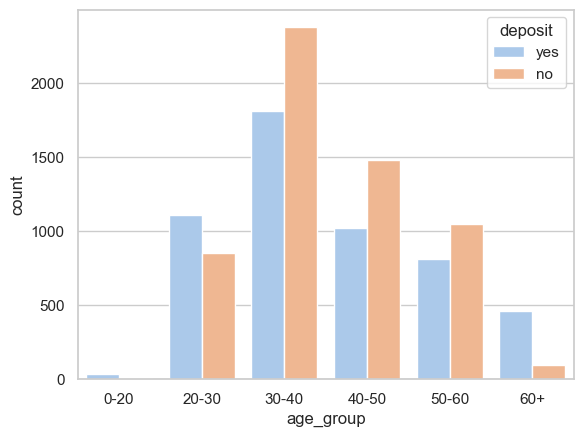

In [749]:
sns.countplot(data=df, x='age_group', hue='deposit')


We've performed a feature selection called Binning, wich transform continuous numerical values into categorical features, then we've a graphic that represents the age group, as we can see here the more active clients are between the 20 and 60 years old.

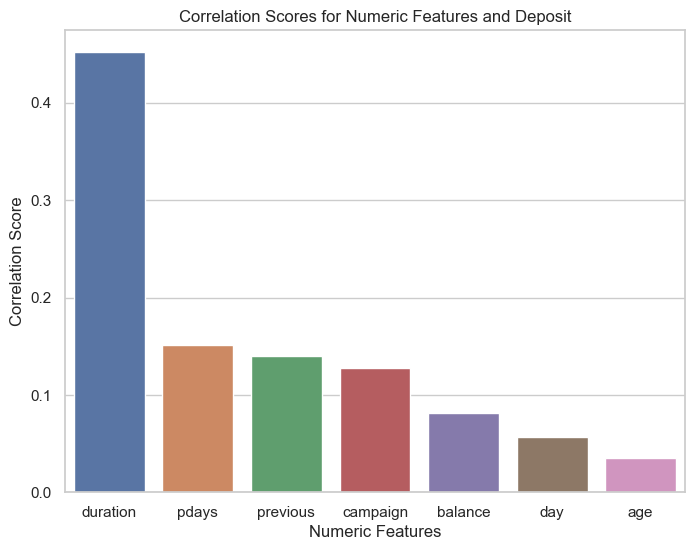

In [750]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['deposit_encoded'] = le.fit_transform(df['deposit'])

num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

corr_scores = []
for feature in num_features:
    corr_score = abs(df[feature].corr(df['deposit_encoded']))
    corr_scores.append((feature, corr_score))


corr_scores = sorted(corr_scores, key=lambda x: x[1], reverse=True)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=[score[0] for score in corr_scores], y=[score[1] for score in corr_scores])
ax.set_xlabel('Numeric Features')
ax.set_ylabel('Correlation Score')
ax.set_title('Correlation Scores for Numeric Features and Deposit')
plt.show()



We have performed a feature selection on the numeric features, and based on the correlation betwen the numerical features and the target variable "deposit", the stronger variables are:
* Duration
* pdays
* previous
* campaign
* balance

## 4. Machine Learning Models

### 4.1: Logistic Regression

In [751]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#create a logistic regression model and fit it to the data.
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

score = logreg.score(X_test,y_test)
print(score)

0.7832512315270936


In [752]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1166
           1       0.78      0.76      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



*Logistic Regression results:*

We've performed a logistic regression model and the model correctly predicted the deposit (yes or no) for 78%

**Setting up Hyperparameters**

In [753]:
from sklearn.model_selection import cross_val_score
# We perform another logistic regresion trying to u¡improve the las one. 
# We modify the Inverse regularization strenght (C)

# Defining a list of candidates for C
c_val = [0.001, 0.01, 0.1, 1, 10, 100]

scores = []

for C in c_val:
    log_reg = LogisticRegression(C=C)
    cv_score = cross_val_score(log_reg, X, y, cv=5, scoring='f1')
    scores.append(np.mean(cv_score))

# Get the best index of the best score    
BestIndex = np.argmax(scores)

Best_C = c_val[BestIndex]

print(f'Best C: ',Best_C)

Best C:  0.1


In [754]:
#create a logistic regression model and set the C value to 0.1

log_reg = LogisticRegression(C=0.1)
log_reg.fit(X_train, y_train)

score = logreg.score(X_test,y_test)
print(f'Accuracy: ',score)

Accuracy:  0.7832512315270936


In [755]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1166
           1       0.78      0.76      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



We've set the C parameter to 0.1 and our model performs as the first one, let's see the metrics

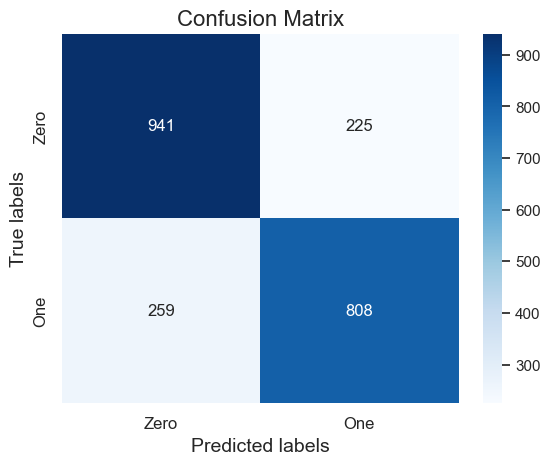

In [756]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define labels for the plot
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()


**Insights of Logistic regression**

As we see here, our presicion for both 0 and 1 are 78%, but the recall is pretty low in 1 (76%) compared with 0 (81%).
in the other hand, our f1-score is 0.8 and 0.77 for both cases.

### 4.2 Desicion Tree Classifier

In [757]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier class
tree_model = DecisionTreeClassifier()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

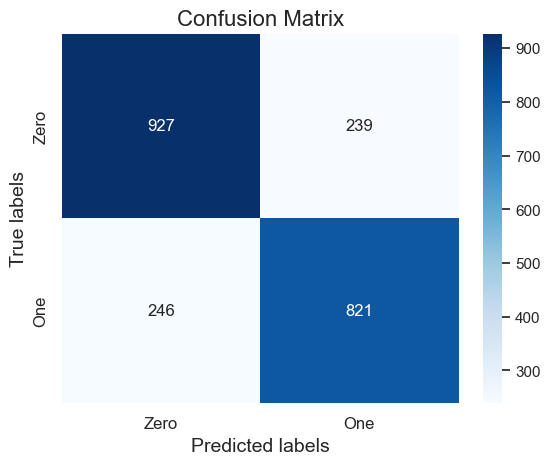

In [758]:
# Let's make a prediction and then see how its behaive with cofusion matrix.
y_pred = tree_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [759]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.783
Precision: 0.775
Recall: 0.769
F1 score: 0.772


** DESICION TREE CLASSIFIER INSIGHTS:** 

As we can see, with the desicion tree model, the metrics are slightly similar to the logistic regression except for the f1 score and precision. these metrics tell us that the desicion tree model is no a quite good fit.

### 4.3: Random Forest Classifier:

In [760]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)


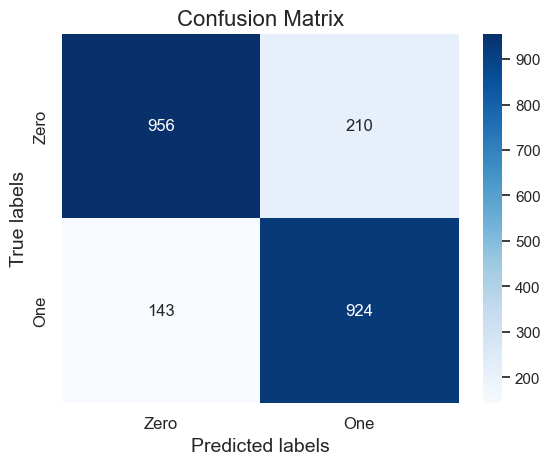

In [761]:
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [762]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.842
Precision: 0.815
Recall: 0.866
F1 score: 0.840


We've perdormed a random forest model and the model seems to perform better than the other ones. all the metrics are higher than logistic regression and desicion tree metrics. 

We have performed three different models and the best one is random forest, but now we have to test the model with a different test set.

## 5. Testing our models with real Data

### 5.1: Load the data and prepare it.

In [763]:
# first we load the data. 
bank_test = pd.read_csv('test.csv', sep=';')
bank_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [764]:
# As we can see our target column is objet type, we need to transform it into binary (0,1)
X_t = pd.get_dummies(bank_test.drop(['y'], axis=1))
# Convert target variable to binary
y_t = bank_test['y'].apply(lambda x: 1 if x == 'yes' else 0)
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

<Axes: xlabel='y', ylabel='count'>

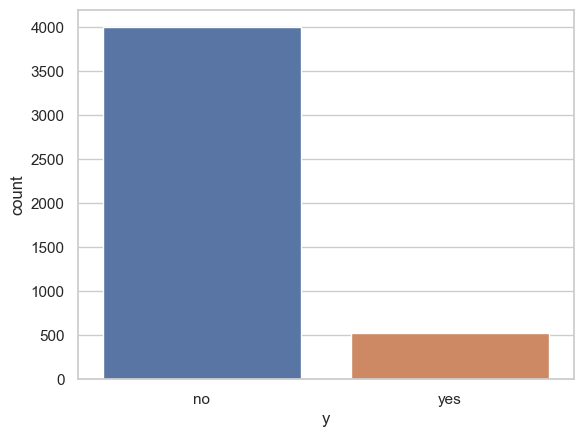

In [765]:
# Let's see if our test set is unbalanced
sns.countplot(data=bank_test, x='y')

#### As we can see our test data is unbalanced, we'll try train our model without balancing the data and campare with balanced data.

### 5.2 Logistic Regression: 

In [766]:
X_train, X_test, y_train, y_test = train_test_split(X_t,y_t,test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

score = logreg.score(X_test,y_test)
print(score)

0.8121546961325967


Our logreg model is 0.81, better than the first one 0.78. 

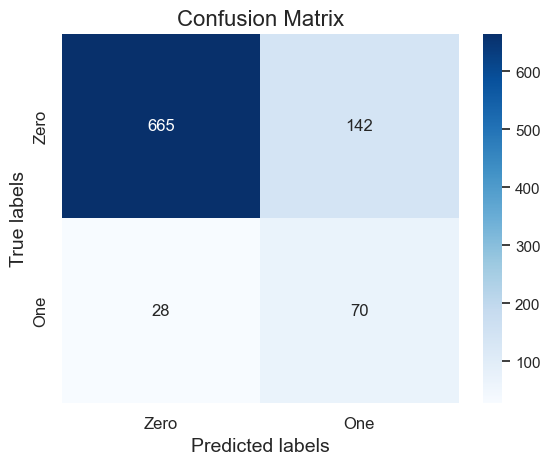

In [767]:
from sklearn.metrics import confusion_matrix

y_t_predic = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_t_predic)

# Define labels for the plot
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_t_predic))
plt.show()

In [768]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_t_predic))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       807
           1       0.33      0.71      0.45        98

    accuracy                           0.81       905
   macro avg       0.64      0.77      0.67       905
weighted avg       0.89      0.81      0.84       905



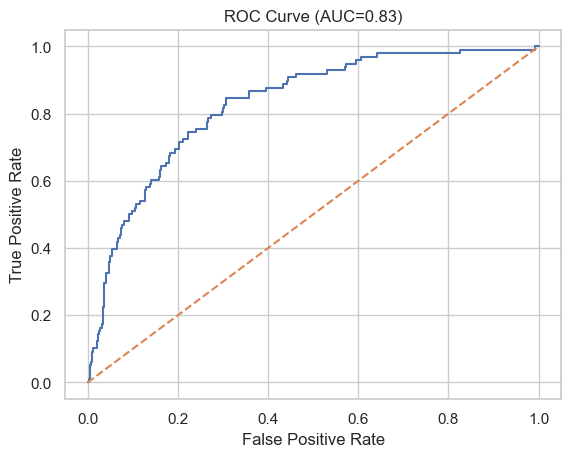

In [769]:
# To see how our model is behaiving lets print ROC-curve
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = log_reg.predict_proba(X_test)[:, 1]  # probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC={auc_score:.2f})')
plt.show()


As we can see here, the sentivite curve is a good indicator of how our model will predict the true cases.

In [770]:
# Lets balance the test data.
X_train, X_test, y_train, y_test = train_test_split(X_t,y_t,test_size=0.2, random_state=42)

log_reg = LogisticRegression(class_weight='balanced', C=1.0)
log_reg.fit(X_train, y_train)

score = logreg.score(X_test,y_test)
print(score)

0.8121546961325967


In [771]:
print(classification_report(y_test, y_t_predic))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       807
           1       0.33      0.71      0.45        98

    accuracy                           0.81       905
   macro avg       0.64      0.77      0.67       905
weighted avg       0.89      0.81      0.84       905



As we can see in the results, the performance is not getting better with balanced data, let's do cross validation to get a better estimate of model's performance


In [772]:
# Perform 5-fold cross-validation and get the accuracy scores
scores = cross_val_score(log_reg, X_t, y_t, cv=5)

# Average score and standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.02)


This result means that our model has an average accuracy of 0.80 whit a estandar deviation of 0.2. it's possible that our model is overfitting or underfitting de data. 

#### Insights of Logistic Regression:

First we perform a logistic regression with the main dataset and these were the results. 

Accuracy: 0.78

Precision:
0: 0.78
1: 0.78

Recall:
0: 0.81
1: 0.76

F1-score: 
0: 0.80
1: 0.77

Support (how many variables)
0: 1166
1: 1067

The model performs very well identifying	the negative variables (0), the f1-score is the best metric to measure this and as we can see its predict better the negatives than the positives.

After this model we tried to perform Logistic regression with the test set, a dataset separated from the original one to test our model with different data and in terms of accuracy is slightly better but our data is too way unbalanced. 

In [773]:
# We will balance our data with under_sampling to take out the majority class of the data.
from imblearn.under_sampling import RandomUnderSampler

randsamp = RandomUnderSampler(random_state = 42)
X_resampled, y_resampled = randsamp.fit_resample(X_t, y_t)

In [774]:
log_reg1 = LogisticRegression()
log_reg1.fit(X_resampled, y_resampled)
score = logreg.score(X_resampled, y_resampled)
print(f'Accuracy: ',score)

Accuracy:  0.7792706333973128


In [775]:
# predict on the test set using your undersampled model
y_pred = log_reg1.predict(X_resampled)

# print the classification report
print(classification_report(y_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       521
           1       0.82      0.75      0.79       521

    accuracy                           0.79      1042
   macro avg       0.80      0.79      0.79      1042
weighted avg       0.80      0.79      0.79      1042



As we can see here, balancing the data has improved our ligistic regression model. 

the results are balanced in a positive way.

now we'll perform a graphic to show the recall and presicion curve to understand the behaivior of our model.

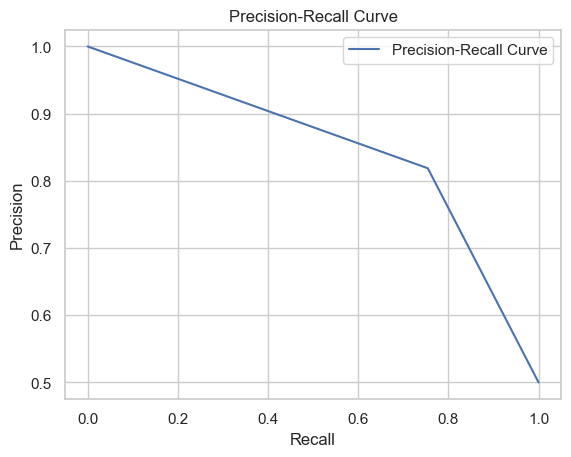

In [776]:
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_resampled, y_pred)


plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

The curve shows that our model has a relatively high precision for a moderate recall rate, but it drops down when the recall rate increases, indicating that our model is struggling to correctly classify the positive examples. 

In [777]:
# Let's do CROSS-VALIDATION 

log_reg = LogisticRegression()
score_test = cross_val_score(log_reg, X_resampled, y_resampled)
# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", score_test)

# Calculate and print the average accuracy score
print("Average accuracy score:", score_test.mean())

Accuracy scores for each fold: [0.80861244 0.74162679 0.80769231 0.77403846 0.78846154]
Average accuracy score: 0.7840863084284138


**Insights of Logistic Regression with the Test Set:**

* At the begining, we perform the logistic regression and we noticed that the data was unbalanced, the unbalanced data affects the model because it can not predict over all data.
* We balance the data using Random Under Sampler, successfully we've balanced the data giving our model a better performance, please note that this method is not recomended because we might lose some sensible data.
* With the balanced data we've got a nice results:

*       0         0.77      0.83      0.80       521
*       1         0.82      0.75      0.79       521

*    accuracy                         0.79      1042
* macro avg       0.80      0.79      0.79      1042
* weighted avg    0.80      0.79      0.79      1042

* **Because the forced balance of the data and the lose of real asset of it, we'll try another models.**

### 5.3: Desicion Tree Classifier Model.

In [778]:
bank_test = pd.read_csv('test.csv', sep=';')
X_t = pd.get_dummies(bank_test.drop(['y'], axis=1))
y_t = bank_test['y'].apply(lambda x: 1 if x == 'yes' else 0)
y_t

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [779]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

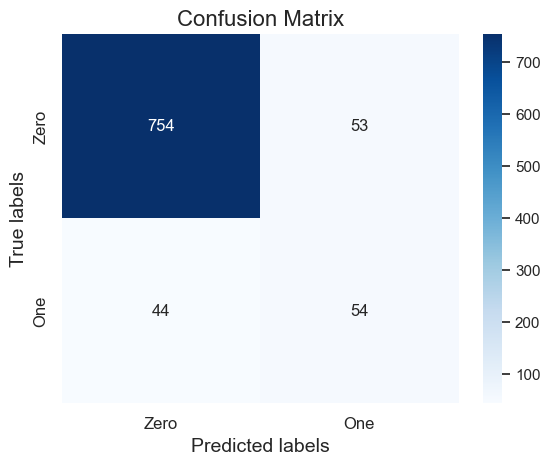

In [780]:
y_pred = tree_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [781]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.893
Precision: 0.505
Recall: 0.551
F1 score: 0.527


**Insights of Random Tree Classifier:**

While the model shows high accuracy **%87** wich means **%87** of the predicted labels match the true labels. 

Recall with **%44** means that out of all the predicted positives cases, only the **%44** of them are actually positive. 

These metrics are the result of the unbalanced data


**We will try to balance the data and make some test and see how our model behaive**

**UNDERSAMPLING DATA**

In [798]:
from imblearn.under_sampling import RandomUnderSampler

undersampl = RandomUnderSampler(random_state = 42)
X_undersampled, y_undersampled = undersampl.fit_resample(X_t, y_t)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_undersampled, y_undersampled, test_size=0.3)


In [799]:
X_train_u.shape

(729, 51)

In [800]:
y_train_u.shape

(729,)

**OVERSAMPLING DATA**

In [806]:
from imblearn.over_sampling import RandomOverSampler 

oversamp = RandomOverSampler(random_state=42)
X_ovesampled, y_ovesampled = oversamp.fit_resample(X_t, y_t)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_ovesampled, y_ovesampled, test_size=0.3)



In [807]:
X_train_o.shape

(5600, 51)

In [808]:
y_train_o.shape

(5600,)

### 5.3.1: DESICION TREE CLASSIFIER (Undersampling Method)

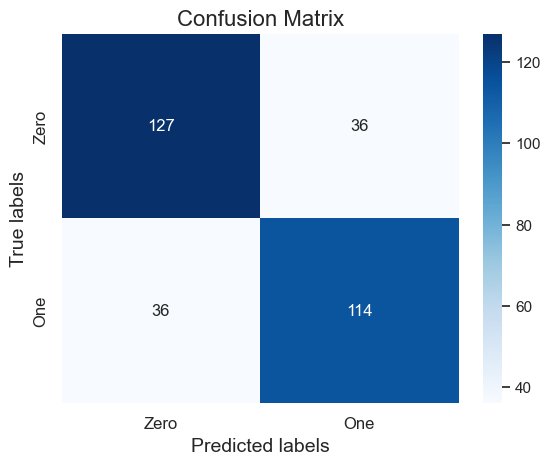

In [801]:
tree_model = DecisionTreeClassifier()   
tree_model.fit(X_train_u, y_train_u)
y_pred_u = tree_model.predict(X_test_u)

cm_dt = confusion_matrix(y_test_u, y_pred_u)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test_u, y_pred_u))
plt.show()

In [802]:
accuracy = accuracy_score(y_test_u, y_pred_u)
precision = precision_score(y_test_u, y_pred_u)
recall = recall_score(y_test_u, y_pred_u)
f1 = f1_score(y_test_u, y_pred_u)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.770
Precision: 0.760
Recall: 0.760
F1 score: 0.760


### 5.3.2: DESICION TREE CLASSIFIER: (OverSampling Method)

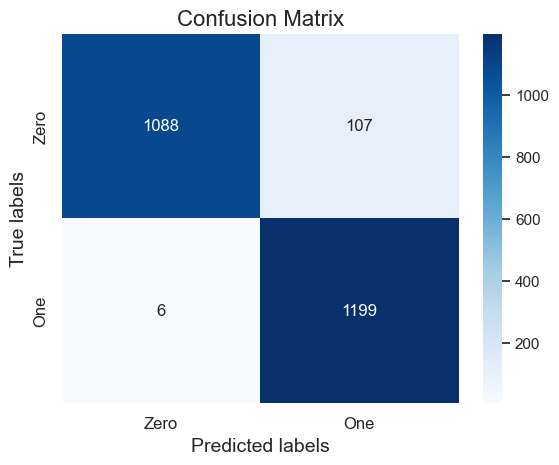

In [809]:
tree_model = DecisionTreeClassifier()   
tree_model.fit(X_train_o, y_train_o)
y_pred_o = tree_model.predict(X_test_o)

cm_dt = confusion_matrix(y_test_o, y_pred_o)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test_o, y_pred_o))
plt.show()

In [811]:
accuracy = accuracy_score(y_test_o, y_pred_o)
precision = precision_score(y_test_o, y_pred_o)
recall = recall_score(y_test_o, y_pred_o)
f1 = f1_score(y_test_o, y_pred_o)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.953
Precision: 0.918
Recall: 0.995
F1 score: 0.955


**To be sure about these metrics wi will perform a cross-validation on the desicion tree classifier**

In [812]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

dtc_oversize = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(dtc_oversize, X_ovesampled, y_ovesampled, scoring='accuracy', cv=kfold)

print('Accuracy: {:.3f} (+ / - {:.3f})'.format(score.mean(), score.std()))

Accuracy: 0.957 (+ / - 0.005)


As we can see here, we performed a **Desicion Tree Classifier** with the test data, due to the test data was imbalanced we perform some techniques to balance the data:

**UNDERSAMPLING** is the technique used with imbalance data, this technique remove samples from the majority class to create a balanced dataset.

**UNDERSAMPLING RESULTS:** 

Accuracy: 0.770
Precision: 0.760
Recall: 0.760
F1 score: 0.760

These weren`t a good result so we tried another method to balance our dataset.

**OVERSAMPLING:** This is another technique used to balance an imbalanced dataset by increasing the number of samples in the minority class. One way to perform oversampling is to randomly duplicate samples from the minority class until the number of samples in both classes is equal.

**OVERSAMPLING RESULTS:** 

Accuracy: 0.953
Precision: 0.918
Recall: 0.995
F1 score: 0.955

**Accuracy Score:** 0.953 suggests that the model is able to correctly predict the majority of the classes.

**Precision Score:** 0.918 suggests that out of all the predicted positive cases, 91.8% of them were actually positive.

**Recall Score:** 0.995 indicates that the model was able to correctly identify 99.5% of the actual positive cases.

**F1 score:** which is a combination of precision and recall, is 0.955

These are the best result so far, but to be sure about the model we've performed a cross-validation on the **Desicion Tree Classifier Model** and this are the result.

**Accuracy: 0.957 (+ / - 0.005)**

**Accuracy score from Cross-Validation:** 0.957 (+/- 0.005) suggests that the model is performing well and consistently across different folds of the data.

The "+/- 0.005" represents the standard deviation of the accuracy scores, which indicates how much the accuracy scores vary from the mean accuracy score.

A smaller standard deviation indicates that the accuracy scores are more consistent and reliable.

